## About the Data

This dataset contains latest Covid-19 India state-wise data as on September 01, 2021. This dataset can be used to analyze covid condition in India.

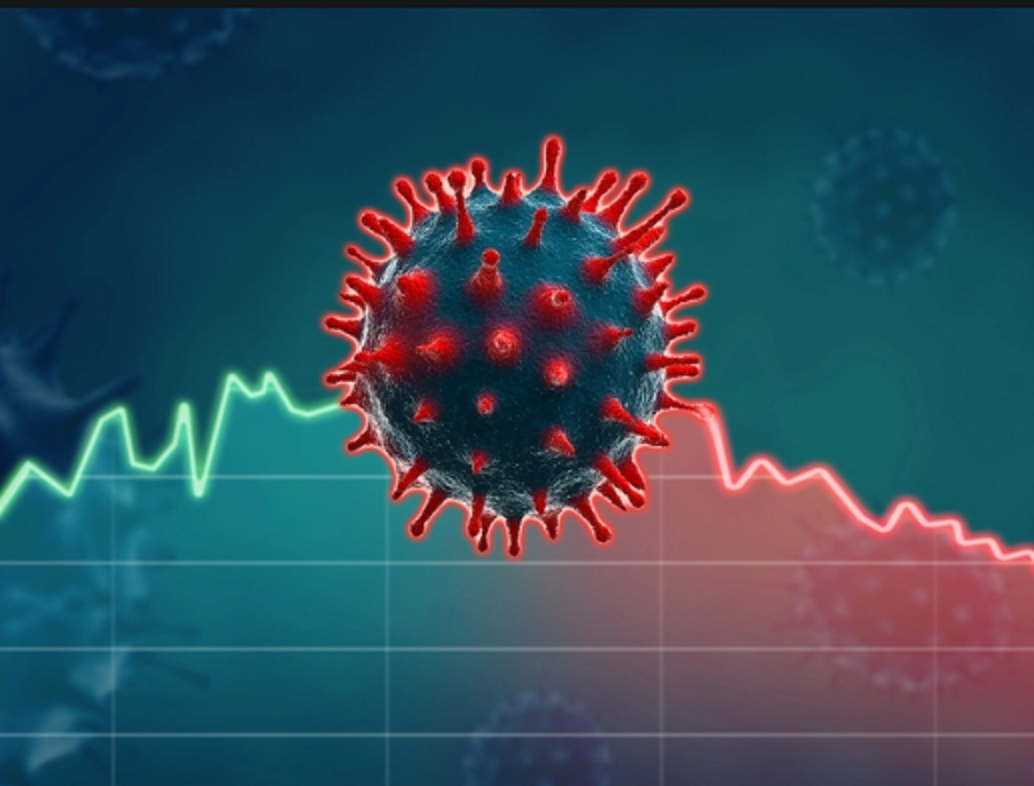

[](https://www.google.com/imgres?imgurl=https%3A%2F%2Fimg.etimg.com%2Fthumb%2Fmsid-79017997%2Cwidth-650%2Cimgsize-482999%2C%2Cresizemode-4%2Cquality-100%2Frain-and-snow-might-dilute-any-traces-of-the-virus-on-benches-or-other-outside-objects-.jpg&imgrefurl=https%3A%2F%2Feconomictimes.indiatimes.com%2Fmagazines%2Fpanache%2Fdoes-weather-affect-spread-of-covid-19-outside-experts-say-virus-can-be-transmitted-in-any-climate-orcan-cold-weather-kill-the-coronavirus-experts-say-climate-doesnt-affect-the-spread-of-covid-19%2Farticleshow%2F79017121.cms&tbnid=MUNEsFVhZFZFxM&vet=12ahUKEwiA7vCckePyAhXVm0sFHYS4D50QMygjegUIARDAAQ..i&docid=RvZ5CAPCEGItXM&w=650&h=488&q=corona%20virus%20images&ved=2ahUKEwiA7vCckePyAhXVm0sFHYS4D50QMygjegUIARDAAQ)

**Attribute Information**

1-State/UTs - Names of Indian States and Union Territories.

2-Total Cases - Total number of confirmed cases

3-Active - Total number of active cases

4-Discharged - Total number of discharged cases

5-Deaths - Total number of deaths

6-Active Ratio (%) - Ratio of number of active cases to total cases

7-Discharge Ratio (%) - Ratio of number of discharged cases to total cases

8-Death Ratio (%) - Ratio of number of deaths to total cases

***Importing essential Library***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
covid_cases = pd.read_csv("../input/latest-covid19-india-statewise-data/Latest Covid-19 India Status.csv")

***exploring the dataset***

In [ ]:
covid_cases.style.background_gradient(cmap='Paired')

In [ ]:
covid_cases.info()

It has 8 columns and 36 rows.

In [ ]:
covid_cases.describe().style.background_gradient(cmap='Set2')

looks like we don't have any missing data, also all the columns have higher mean value than the median except 'discharge ratio' and 'death ratio'

In [ ]:
#overview of all the feature in dataset
import pandas_profiling as pp

pp.ProfileReport(covid_cases, title = 'covid cases in India',dark_mode=True)


***looking for the Null values***

In [ ]:
# for checking null values in a visualization form

import missingno as msno

msno.bar(covid_cases, figsize=(8,6))


looks like we don't have any values

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=covid_cases['Total Cases'],y=covid_cases['State/UTs'],palette='viridis')

maharstra has more than 63 lakhs cases and kerela has 40 lakhs cases

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=covid_cases['Active'],y=covid_cases['State/UTs'],palette='viridis')

kerela has the highest active cases followed by Maharastra

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=covid_cases['Discharged'],y=covid_cases['State/UTs'],palette='viridis')

Maharastra has the highest Discharge rate % followed by Kerela, Karnataka and Tamil Nadu.

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=covid_cases['Deaths'],y=covid_cases['State/UTs'],palette='viridis')

Maharstra has the Highest Death % follwd by Karnataka

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=covid_cases['Active Ratio (%)'],y=covid_cases['State/UTs'],palette='viridis')

Looks Like North-East states has the highest Active Ratio(%) ... first is Mizoram than Kerela than Meghalaya followed by Manipur and sikkim.

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=covid_cases['Discharge Ratio (%)'],y=covid_cases['State/UTs'],palette='viridis')

Okayy...That Looks amazing..! 🤩 almost all the states have a Discharge Ratio(%) more than 85% except mizoram which has a discharge rate of 84%

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=covid_cases['Death Ratio (%)'],y=covid_cases['State/UTs'],palette='viridis')

Punjab has the Highest Death ratio(%) followed by Uttarakhand and Maharastra

### Interactive plotting

for this I will be using **Plotly and Cufflinks**

***Plotly*** is a charting library built on top of d3.js that can be used directly with Pandas data frames and ***Cufflinks*** is another library that connects the Pandas data frame with Plotly enabling users to create visualizations directly from Pandas.

<img src="https://editor.analyticsvidhya.com/uploads/149315.gif">

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import cufflinks as cf

init_notebook_mode(connected=True)

cf.go_offline()

**Bivariate analysis**

In [ ]:
covid_cases.iplot(kind='scatter',x='Total Cases',y='Active Ratio (%)',mode='markers',size=10, xTitle='tot. cases',
                 yTitle='Active(%)', theme='solar',color = 'white')


from above we can see that there is one state which has total cases less than 1Million but active(%) is very high as compared to other state and also we have one state in which the total cases is more than 6Million but active(%) is less

**let's see which are these states**

In [ ]:
max_active = covid_cases[(covid_cases['Total Cases'] < 1000000) & (covid_cases['Active Ratio (%)'] > 10) ]

less_active = covid_cases[(covid_cases['Total Cases'] > 6000000) & (covid_cases['Active Ratio (%)'] < 2) ]


In [ ]:
max_active

In [ ]:
less_active

In [ ]:
covid_cases.iplot(kind='scatter',x='Total Cases',y='Death Ratio (%)',mode='markers',size=10, xTitle='tot. cases',
                 yTitle='Death(%)', theme='solar',color = 'white')

from above we can see that there is one state which has total cases less than 1Million but Death(%) is  high as compared to other state and we know that Maharastra is the only state with which has total cases of more than 6M people.

In [ ]:
covid_cases[(covid_cases['Death Ratio (%)'] > 2.5)]

In [ ]:
covid_cases.iplot(kind='scatter',x='Total Cases',y='Discharge Ratio (%)',mode='markers',size=10, xTitle='tot. cases',
                 yTitle='Discharge Ratio (%)', theme='solar',color = 'white')

Almost all the states has Discharge(%) of more than 90% But we can see that we have an outlier...Let's see which state is it.

In [ ]:
covid_cases[(covid_cases['Discharge Ratio (%)'] < 85)]

In [ ]:
covid_cases[['State/UTs', 'Active Ratio (%)']].pivot(columns='State/UTs', values='Active Ratio (%)').iplot(kind='box')

you can simply click on the dropdown list and then select the states to see active(%) of that particular state.

In [ ]:
covid_cases[['State/UTs', 'Death Ratio (%)']].pivot(columns='State/UTs', values='Death Ratio (%)').iplot(kind='box')

you can simply click on the dropdown list and then select the states to see Death(%) of that particular state.

In [ ]:
covid_cases[['Active Ratio (%)','Death Ratio (%)']].iplot(kind="histogram", bins=20, theme="white", title="Active(%) vs Death(%)")

Death(%) is less as compared to active(%)

In [ ]:
covid_cases.iplot(kind="scatter", theme="white",x="Total Cases",y="State/UTs",xTitle='tot. Deaths',yTitle='state',color='green')

In [ ]:
covid_cases.iplot(kind='bar',x='Deaths',y='State/UTs',xTitle='tot. Deaths',yTitle='state')

In [ ]:
plt.figure(figsize=(10,12))
sns.barplot(x=covid_cases['Deaths'],y=covid_cases['State/UTs'],palette='viridis')

from above two pos we can see that maharastra has the highest death followd by karnataka and Tamil Nadu.

In [ ]:
covid_cases.iplot(kind='scatter',x='Discharged',y='State/UTs',xTitle='Discharged',yTitle='state', color='green')

you can simply point at the line to see the discharge rate of the particular state

In [ ]:
covid_cases.iplot(kind='scatter',x='Active',y='State/UTs',xTitle='tot. Deaths',yTitle='state', color='blue')

looks like kerela has the most Active cases and also you can simply point at the line to see the Active cases of the particular state

In [ ]:
covid_cases.iplot(kind='scatter',x='Active Ratio (%)',y='Death Ratio (%)',mode='markers',size=10,
                 xTitle='Active Ratio (%)',yTitle='Death Ratio (%)', color='purple')

In [ ]:
covid_cases.iplot(kind='scatter',x='Active Ratio (%)',y='Discharge Ratio (%)',mode='markers',size=10,
                 xTitle='Active Ratio (%)',yTitle='Discharge Ratio (%)', color='purple')

Discharge ratio(%)  is higher with respect to Active ratio(%)

In [ ]:
covid_cases[['Death Ratio (%)','State/UTs']].iplot(kind='box',theme='white')

from above we can see that death ratio(%) has a median 1.3% and has mean of 1.26%

In [ ]:
covid_cases[['Discharge Ratio (%)','State/UTs']].iplot(kind='box',theme='white')

**we can see that Discharge Ratio(%) has median of 98% and has a mean of 97%, we can also see that the bottom whisker of the plot is much higher with compariation to the above whisker this is due to the state of **Mizoram** ***which has a lower discharge rate i.e., 85%***

In [ ]:
covid_cases[['Active Ratio (%)','State/UTs']].iplot(kind='box',theme='white')

Active Ratio(%) has a median of 0.535000% which is much lower than the Death ratio and Discharge ratio and also it has a mean of 1.255278 
Also we can see that here upper whisker of boxplot is higher w.r.t to the lower whisker and this is due the the state of **"Mizoram"** which has an active Ratio(%) of 15.030000%

In [ ]:
covid_cases[['Total Cases','State/UTs']].iplot(kind='box',theme='white', color='black')

Total case has median of 468.645K 

In [ ]:
covid_cases[['Active','State/UTs']].iplot(kind='box',theme='white', color='black')

Active cases has a much lower median i.e., 839

In [ ]:
covid_cases[['Discharged','State/UTs']].iplot(kind='box',theme='white', color='black')

Discharged people has a median of 459.735k

In [ ]:
covid_cases[['Deaths','State/UTs']].iplot(kind='box',theme='white', color='black')

***from above we can see that in quarter1 average death rate was 806.5 and in quarter2(median) was 5396 but from q2 to q3 there was a sudden rise in the death rate, In q3 it was 13.706k***

In [ ]:
sns.heatmap(covid_cases.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(14,7)
plt.show()

***from above we can see that 'Total cases' and 'Deaths' are the most correlated feature, which makes sense because inreases in tot. cases will lead to more deaths and most uncorrelated features are 'Active Ratio' and 'Discharge Ratio'***

**In next part I will cover the geographical plotting**